In [1]:
# import lmao
from lmao._utils import *

# ALICE Infologger Preprocessing

In [2]:
from lmao.preprocessing import LMAOPrep

In [3]:
prep = LMAOPrep(data_type='alice_info')

Created prep class


In [4]:
prep.from_parsed_csv(csv_path='dataset/ALICE-OSLdataset/phob_test_20220312_sample_struct_no_new15.csv')

'dataset/ALICE-OSLdataset/phob_test_20220312_sample_struct_no_new15.csv'

In [5]:
prep.prep_data(label_path='dataset/OneDrive_1_2-5-2024/runs.csv',
               eor_path='dataset/OneDrive_1_2-5-2024/eor_reasons.csv')

Preprocessing to LMAO format with label from alice_info
Path :dataset/OneDrive_1_2-5-2024/runs.csv


/Users/IsRealNPK/LMAO/lmao/preprocessing/alice_info.py:65: DtypeWarning: Columns (27,28,36) have mixed types. Specify dtype option on import or set low_memory=False.
  run_df = pd.read_csv(label_path)


Stating map RunID from label file


  0%|          | 0/23177 [00:00<?, ?it/s]

Stating map EOR from EOR file


  0%|          | 0/2831 [00:00<?, ?it/s]

Drop all severity D
Normalize EOR


  0%|          | 0/9712742 [00:00<?, ?it/s]

Getting Crashed from EOR
Returning dataframe
Done


In [6]:
prep.df.to_parquet('dataset/PArtDataset.parquet.gzip', compression='gzip')

In [66]:
prep.df.to_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_label.parquet.gzip', compression='gzip')

# ALICE Bertopic

In [2]:
from lmao.topicmodel import LMAOTopic
topic_model = LMAOTopic()

Topic model mode set to :BERTopic.
Start Initialized


In [3]:
df = pd.read_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_label.parquet.gzip')

In [23]:
def find_error(text):
    if 'error' in text:
        return 'Have Error'
    else :
        return 'Not have Error'

In [31]:
import plotly.express as px
data_canada = df[df['event_template'] == 'Equipment <*>']['content'].apply(find_error).value_counts()
fig = px.bar(data_canada)
fig.update_layout(title_text='<b>Distribution between<b>'+
                  '<br><b>have<b> and <b>not have<b> "Error"' +
                  '<br>inside content from <b>"Equipment"<b> <*>',
                      title_x=0.5,
                      width=640,
                      height=480,
                      plot_bgcolor='rgba(0, 0, 0, 0)',
                      paper_bgcolor='rgba(0, 0, 0, 0)',)
fig.show()

In [ ]:
# topic_model.training_model(df=df)

In [ ]:
# topic_dict = topic_model.topic_dict

In [11]:
# %%timeit
# topic_model.model.transform(df.content.tolist()[:1000])
# topic, _ = topic_model.model.transform(df.content.tolist()[0])
# topic

1.25 s ± 304 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
topic_model.from_trained_model(model_path='lmao/topicmodel/model/BERTopic-ALICE_info_no_severity_D-all-MiniLM-L6-v2')

Done


In [4]:
topic_dict = topic_model.topic_dict

In [5]:
embeddings = topic_model.get_embeddings()

In [6]:
df = pd.read_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_label.parquet.gzip')

In [7]:
df = topic_model.get_topic(df=df)

In [38]:
topic_model.model.visualize_topics(top_n_topics=20)

In [47]:
topic_model.model.topic_labels_

{-1: '-1_mb equipment_taskid_detected previous_gap in',
 0: '0_sending quality_objects sending_quality objects_sending',
 1: '1_startofcycle startofcycle_startofcycle_startofcycle equipment_startofcycle configure',
 2: '2_storing qualityobjects_qualityobjects storing_qualityobjects_storing',
 3: '3_endofcycle endofcycle_endofcycle_1664473857380_timestamp 1664473857380',
 4: '4_check rawbunchminamplitude_rawbunchminamplitude quality_rawbunchminamplitude_quality good',
 5: '5_updating the_triggertype timestamp_triggertype_to trigger',
 6: '6_libo2qccommon loading_library libo2qccommon_libo2qccommon_loading library',
 7: '7_completed start_start readout_readout completed_completed',
 8: '8_aggregator starting_starting aggregator_aggregator_starting',
 9: '9_subtimeframe timeout_subtimeframe_aggregator subtimeframe_50 seconds',
 10: '10_slice timeout_slice_aggregator slice_timeout 00',
 11: '11_completed file_player replay_1st loop_loop completed',
 12: '12_executing start_start readout_re

In [8]:
topics_per_class = topic_model.model.topics_per_class(df.content.tolist(), df.label.tolist())
topic_model.model.visualize_topics_per_class(topics_per_class)

In [9]:
topics_per_class = topic_model.model.topics_per_class(df.content.tolist(), df.EOR.tolist())
topic_model.model.visualize_topics_per_class(topics_per_class)

In [54]:
df[df['topic']==177]

,session_id,severity,content,event_id,event_template,label,EOR,EOR_id,run_quality,topic
179910,24064,I,Stopping DMA for ROC H1-D4-F0,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
179911,24064,I,Stopping DMA for ROC H1-D4-F1,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
179912,24064,I,Stopping DMA for ROC H0-D0-F0,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
179913,24064,I,Stopping DMA for ROC H0-D0-F1,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
187195,24064,I,Stopping DMA for ROC H1-D4-F0,505,Stopping DMA for ROC <*>,not crashed,eor test.,61.0,test,177
...,...,...,...,...,...,...,...,...,...,...
34847621,24356,I,ITSDecoder registered new link link cruID:0x00...,440,ITSDecoder registered new link link cruID:<*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,177
34848487,24356,I,ITSDecoder registered new link link cruID:0x00...,440,ITSDecoder registered new link link cruID:<*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,177
34849602,24356,I,ITSDecoder Attaching link cruID:0x00c1/lID8 fe...,441,ITSDecoder Attaching link cruID:<*>feeID:<*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,177
34849603,24356,I,ITSDecoder Attaching link cruID:0x00c1/lID9 fe...,441,ITSDecoder Attaching link cruID:<*>feeID:<*>,crashed,triggers out synch. disabling ctp readout.,59.0,bad,177


In [8]:
df.to_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_topic.parquet.gzip')

# LMAO graph

In [6]:
from lmao.graph import LMAOGraph

In [7]:
data = LMAOGraph(df=pd.read_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_topic.parquet.gzip'),mode='pyg', padding=False)

Topics size of this dataframe is : 2149
Getting Group by from dataframe


  0%|          | 0/126 [00:00<?, ?it/s]

Max sequence size of this dataframe is : 772369
Please call .get_PyG() to get PyG dataloader.


In [7]:
data.df['X'].apply(len).sort_values(ascending=False).index[110]

41

In [8]:
G = data.get_one_graph(i=41, feature=False)
len(G.nodes())

84

In [9]:
data.df['y'][41]

'crashed'

In [10]:
from lmao.visualizer.plot import plotly_digraph

In [12]:
plotly_digraph(G, label=data.df['y'][41], topic_dict=topic_dict)

In [36]:
data = LMAOGraph(df=pd.read_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_with_topic.parquet.gzip'),mode='freq')

Topics size of this dataframe is : 2149
Getting Group by from dataframe


  0%|          | 0/126 [00:00<?, ?it/s]

Apply Count to calculate each topic frequency


  0%|          | 0/126 [00:00<?, ?it/s]

Expanding X into 2149 features


  0%|          | 0/126 [00:00<?, ?it/s]

In [37]:
data.df.to_parquet('dataset/ALICE-OSLdataset/ALICE_info_no_severity_D_freq_with_label.parquet.gzip')

# Classification

In [66]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data.df,test_size=0.2, stratify=data.df.y)

In [67]:
# lgb.plot_importance(lgb_clf, importance_type="gain", figsize=(7,12), title="LightGBM Feature Importance (Gain)")
# plt.show()

In [68]:
from lmao.classifier import LMAOClassifier

In [69]:
del clf

In [70]:
clf = LMAOClassifier(model_type='lgbm')
clf.fit(train_df.drop(columns='y'), train_df.y)

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14732
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1240
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [71]:
pred = clf.predict(test_df.drop(columns='y'))

In [72]:
print(clf.eval_report(test_df.drop(columns='y'), test_df.y))

              precision    recall  f1-score   support

     crashed      0.857     1.000     0.923        12
 not crashed      1.000     0.857     0.923        14

    accuracy                          0.923        26
   macro avg      0.929     0.929     0.923        26
weighted avg      0.934     0.923     0.923        26



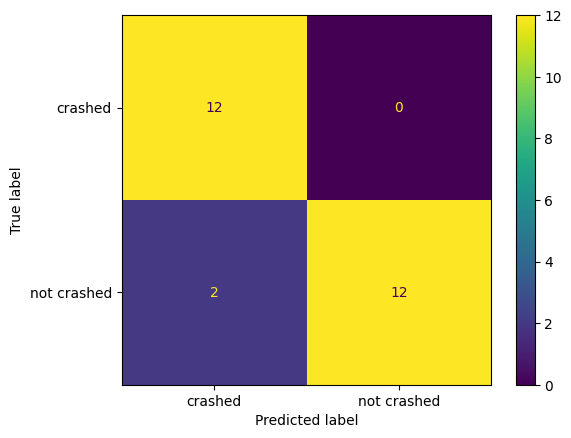

In [73]:
clf.confusion_matrix_plot(test_df.drop(columns='y'), test_df.y)